In [317]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from skimage import io
import matplotlib.pyplot as plt
import math
import pickle
import statistics
from statistics import mean
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pickle

In [214]:
import speckle
from speckle.inference.read_in_data import *
from speckle.inference.correlation_heatmap import *
from speckle.inference.calculating_tau import *
from speckle.inference.dedrift import *

In [215]:
def compute_g2t_wo_kernel(px,laglist_g2t):
    intensity=[]
    for t in range(0,img.shape[0],1):
        intensity.append(img[t][px[0],px[1]])
        
    g2t=[]
    for lag in laglist_g2t:
        numerator_sum=0
        denumerator_sum_1=0
        denumerator_sum_2=0
        max_t_range=500
        for t in range(0,max_t_range,1):
            numerator_sum=numerator_sum+int(intensity[t])*int(intensity[t+lag])
            denumerator_sum_1=denumerator_sum_1+int(intensity[t])
            denumerator_sum_2=denumerator_sum_2+int(intensity[t+lag])
        numerator=numerator_sum/max_t_range
        denumerator_1=denumerator_sum_1/max_t_range
        denumerator_2=denumerator_sum_2/max_t_range
        g2t.append((numerator/denumerator_1/denumerator_2)-1)
    return g2t

# Viscosity of 0.05% glycerol (4 uL glycerol + 196 uL)

viscosity is 0.44340027170068147 Pa*s from DLS data

In [6]:
#expected D
kb=1.380649*10**(-23) # J*K^(-1)
T=300 # K
eta=0.44340027170068147 # Pa*S
r=50*10**(-9) # m
D=kb*T/(6*math.pi*eta*r) #m^2/s
print(D) #m^2/s

9.91145594846258e-15


# 0.05% 100nm in diameter PS beads in glycerol

## 10x Objective

### 1 A.U. 30x magnification

In [216]:
video_time_length=60 #s
imgname='0p05percent_100nm_in_glycerol_10xobj_30xmag_1au_1min_200umhigh_0930_faster'
foldername='/Volumes/WENYUN WANG/20220929/'

In [217]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [218]:
framespeed

0.01058014459530947

In [219]:
laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(10,11,1):
    for x in range(12,13,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

In [220]:
average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [221]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

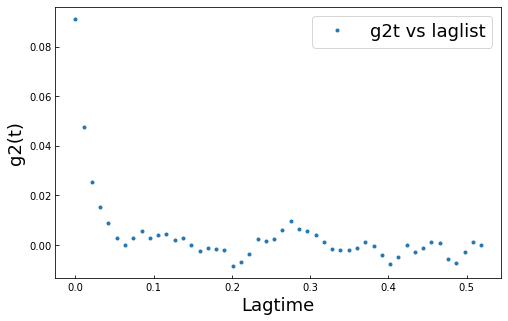

In [222]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t[0:50],average_g2t[0:50],'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Lagtime",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.025411182582563658
y = -39.35275 * x + -2.53905


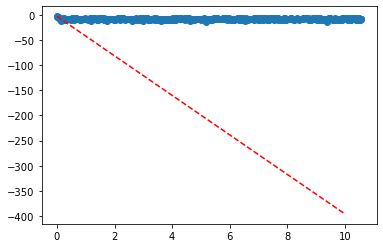

R square is 0.9943909355473848


In [183]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[100:200])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,0,8, True)

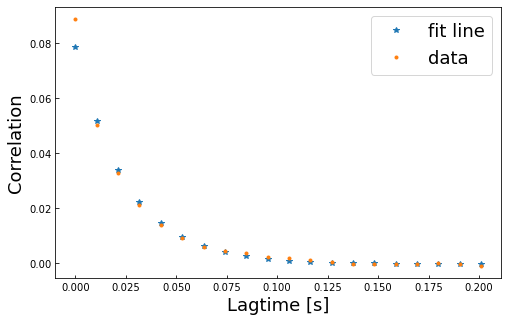

In [196]:
reconstruct(lagtime_g2t[0:20],plateau,np.array(average_g2t[0:20]),a,b)
#plt.ylim(0,0.1)
#plt.xlim(0,lagtime_g2t[20])
#plt.yscale("log")

In [197]:
n=1.47
angle=np.arange(180-19.77,180+19.77,1)
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*np.sin(np.radians(angle/2))*10**(9)*n

q=np.mean(q)
D=a/(-2*q**2)
print(D)

9.554648323036854e-15


### 1 A.U. 40x Magnification

In [ ]:
video_time_length=60 #s
imgname='0p05percent_100nm_in_glycerol_10xobj_40xmag_1au_1min_200umhigh_0930_faster'
foldername='/Volumes/WENYUN WANG/20220929/'

In [141]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [142]:
framespeed

0.017123287671232876

In [143]:
laglist_g2t=range(0,200,1)
averaged_g2t=[]
for y in range(15,50,1):
    for x in range(30,40,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

In [144]:
average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [145]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

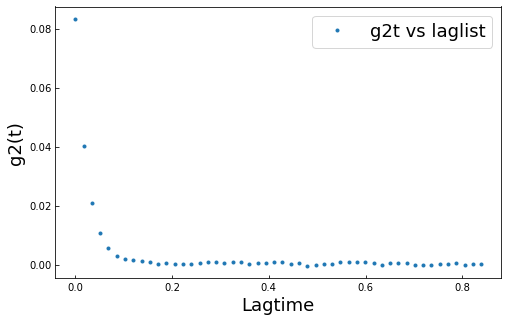

In [146]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t[0:50],average_g2t[0:50],'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Lagtime",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

tau is: 0.025195418400737624
y = -39.68976 * x + -2.57150


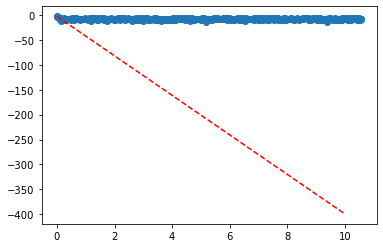

R square is 0.9997654703737983


In [198]:
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plateau=np.mean(average_g2t[100:200])
tau, a, b=fit_exponential_decay_rsq(plateau,np.array(average_g2t),lagtime_g2t,1,6, True)

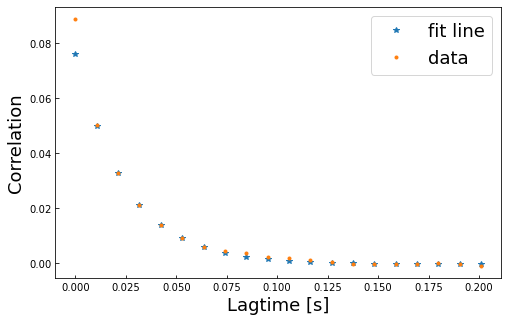

In [199]:
reconstruct(lagtime_g2t[0:20],plateau,np.array(average_g2t[0:20]),a,b)
#plt.yscale("log")

In [200]:
n=1.47
angle=np.arange(170,190,1)
lamda=405 #nm
k=2*math.pi/lamda
q=2*k*np.sin(np.radians(angle/2))*10**(9)*n

q=np.mean(q)
D=a/(-2*q**2)
print(D)

9.563399932243368e-15


## 63x oil objective

### 1 A.U.

In [202]:
video_time_length=60 #s
imgname='0p05percent_100nm_in_glycerol_63xobj_15xmag_1au_1min_30umhigh'
foldername='/Volumes/WENYUN WANG/20220929/'

img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [204]:
laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(15,40,1):
    for x in range(20,40,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)
        
average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [205]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

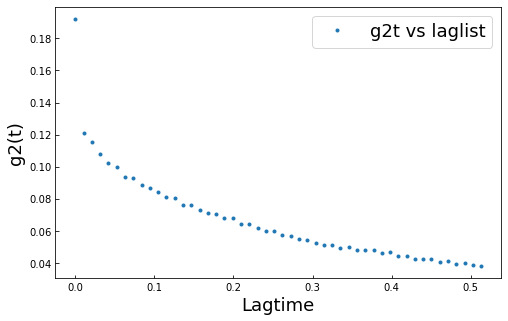

In [206]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t[0:50],average_g2t[0:50],'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Lagtime",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

## 40x water objective

### 1 au

In [207]:
video_time_length=60 #s
imgname='0p05percent_100nm_in_glycerol_40wxobj_15xmag_1au_1min_100umhigh'
foldername='/Volumes/WENYUN WANG/20220929/'

img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [208]:
laglist_g2t=range(0,1000,1)
averaged_g2t=[]
for y in range(15,40,1):
    for x in range(20,40,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)
        
average_g2t=np.mean(averaged_g2t,axis=0)
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [209]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

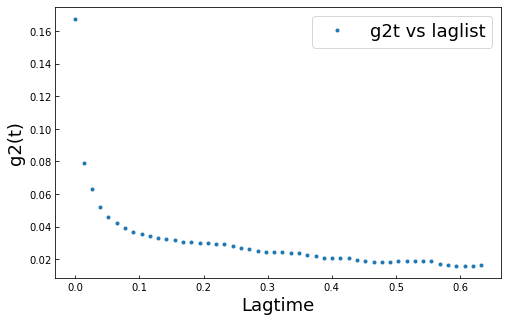

In [212]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t[0:50],average_g2t[0:50],'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Lagtime",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')